Importing required packages

In [ ]:
import pandas as pd
import preprocessing as pps

Read the data from the CSV file

In [ ]:
df = pd.read_csv('data/Train.csv')
df.head(10)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
5,train_id_5,2016-01-17,TU 0283,TLS,TUN,2016-01-17 16:20:00,2016-01-17 18.15.00,ATA,TU 736IOP,53.0
6,train_id_6,2016-01-18,TU 0514,TUN,BCN,2016-01-18 07:15:00,2016-01-18 09.00.00,ATA,TU 32AIMH,10.0
7,train_id_7,2016-01-18,TU 0716,TUN,ORY,2016-01-18 07:35:00,2016-01-18 09.55.00,ATA,TU 32AIMI,15.0
8,train_id_8,2016-01-18,TU 0752,TUN,FCO,2016-01-18 07:40:00,2016-01-18 09.00.00,ATA,TU 32AIMC,16.0
9,train_id_9,2016-01-18,TU 0996,TUN,NCE,2016-01-18 07:45:00,2016-01-18 09.15.00,ATA,TU 31AIMK,21.0


One function to rule them all

In [ ]:
#df = pps.clean_data(df) # When you run it you do not need to run the rest below.
#df.to_csv('data/cleaned_data.csv', index=False)
#df.head(10)

Overviev of the data

In [ ]:
df.head(10)
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [ ]:
# add aircraft type column
df = pps.add_ac_type(df) 
df.head(10)
df.AC_TYPE.value_counts()
df.head(10)

Added 'AC_TYPE' column based on 'AC' column.


,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,AC_TYPE,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,32A,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,31B,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,32A,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,736,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,320,22.0
5,train_id_5,2016-01-17,TU 0283,TLS,TUN,2016-01-17 16:20:00,2016-01-17 18.15.00,ATA,TU 736IOP,736,53.0
6,train_id_6,2016-01-18,TU 0514,TUN,BCN,2016-01-18 07:15:00,2016-01-18 09.00.00,ATA,TU 32AIMH,32A,10.0
7,train_id_7,2016-01-18,TU 0716,TUN,ORY,2016-01-18 07:35:00,2016-01-18 09.55.00,ATA,TU 32AIMI,32A,15.0
8,train_id_8,2016-01-18,TU 0752,TUN,FCO,2016-01-18 07:40:00,2016-01-18 09.00.00,ATA,TU 32AIMC,32A,16.0
9,train_id_9,2016-01-18,TU 0996,TUN,NCE,2016-01-18 07:45:00,2016-01-18 09.15.00,ATA,TU 31AIMK,31A,21.0


In [ ]:
#Filter only flight status ATA
df = pps.filter_flight_status(df)
df.STATUS.value_counts()

Filtering DataFrame for flights with status 'ATA'.


STATUS
ATA    93679
Name: count, dtype: int64

In [ ]:
#convert STA and STD date (object) to datetime
# We need them for the future calculations
df = pps.convert_to_datetime(df)
df.STA.info()
df.STD.info()

Converted 'STA' and 'STD' columns to datetime format.
<class 'pandas.core.series.Series'>
RangeIndex: 93679 entries, 0 to 93678
Series name: STA
Non-Null Count  Dtype         
--------------  -----         
93679 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 732.0 KB
<class 'pandas.core.series.Series'>
RangeIndex: 93679 entries, 0 to 93678
Series name: STD
Non-Null Count  Dtype         
--------------  -----         
93679 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 732.0 KB


In [ ]:
df.head(10)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,AC_TYPE,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,32A,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,31B,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,32A,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,736,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,320,22.0
5,train_id_5,2016-01-17,TU 0283,TLS,TUN,2016-01-17 16:20:00,2016-01-17 18:15:00,ATA,TU 736IOP,736,53.0
6,train_id_6,2016-01-18,TU 0514,TUN,BCN,2016-01-18 07:15:00,2016-01-18 09:00:00,ATA,TU 32AIMH,32A,10.0
7,train_id_7,2016-01-18,TU 0716,TUN,ORY,2016-01-18 07:35:00,2016-01-18 09:55:00,ATA,TU 32AIMI,32A,15.0
8,train_id_8,2016-01-18,TU 0752,TUN,FCO,2016-01-18 07:40:00,2016-01-18 09:00:00,ATA,TU 32AIMC,32A,16.0
9,train_id_9,2016-01-18,TU 0996,TUN,NCE,2016-01-18 07:45:00,2016-01-18 09:15:00,ATA,TU 31AIMK,31A,21.0


In [ ]:
# add flight duration column
df = pps.add_flight_duration(df)
df.flight_duration.describe()
df.head(10)

Calculated flight duration in minutes and added 'flight_duration' column.


,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,AC_TYPE,target,flight_duration
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,32A,260.0,145.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,31B,20.0,110.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,32A,0.0,155.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,736,0.0,170.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,320,22.0,80.0
5,train_id_5,2016-01-17,TU 0283,TLS,TUN,2016-01-17 16:20:00,2016-01-17 18:15:00,ATA,TU 736IOP,736,53.0,115.0
6,train_id_6,2016-01-18,TU 0514,TUN,BCN,2016-01-18 07:15:00,2016-01-18 09:00:00,ATA,TU 32AIMH,32A,10.0,105.0
7,train_id_7,2016-01-18,TU 0716,TUN,ORY,2016-01-18 07:35:00,2016-01-18 09:55:00,ATA,TU 32AIMI,32A,15.0,140.0
8,train_id_8,2016-01-18,TU 0752,TUN,FCO,2016-01-18 07:40:00,2016-01-18 09:00:00,ATA,TU 32AIMC,32A,16.0,80.0
9,train_id_9,2016-01-18,TU 0996,TUN,NCE,2016-01-18 07:45:00,2016-01-18 09:15:00,ATA,TU 31AIMK,31A,21.0,90.0


In [ ]:
# add month (Jan, Feb, Mar ..) and daypart (Early Morning, Morning, Afternoon, Evening, Night) columns
df = pps.add_month(df)
df = pps.add_dayparts(df)
df = pps.add_hour_bucket(df)
df.head(10)

Added 'month' column with abbreviated month names.
Added 'dayparts' column based on 'STD' hour.


,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,AC_TYPE,target,flight_duration,month,dayparts,hour_bucket
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,32A,260.0,145.0,Jan,Morning,h10
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,31B,20.0,110.0,Jan,Afternoon,h15
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,32A,0.0,155.0,Jan,Night,h04
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,736,0.0,170.0,Jan,Afternoon,h14
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,320,22.0,80.0,Jan,Afternoon,h14
5,train_id_5,2016-01-17,TU 0283,TLS,TUN,2016-01-17 16:20:00,2016-01-17 18:15:00,ATA,TU 736IOP,736,53.0,115.0,Jan,Afternoon,h16
6,train_id_6,2016-01-18,TU 0514,TUN,BCN,2016-01-18 07:15:00,2016-01-18 09:00:00,ATA,TU 32AIMH,32A,10.0,105.0,Jan,Early Morning,h07
7,train_id_7,2016-01-18,TU 0716,TUN,ORY,2016-01-18 07:35:00,2016-01-18 09:55:00,ATA,TU 32AIMI,32A,15.0,140.0,Jan,Early Morning,h07
8,train_id_8,2016-01-18,TU 0752,TUN,FCO,2016-01-18 07:40:00,2016-01-18 09:00:00,ATA,TU 32AIMC,32A,16.0,80.0,Jan,Early Morning,h07
9,train_id_9,2016-01-18,TU 0996,TUN,NCE,2016-01-18 07:45:00,2016-01-18 09:15:00,ATA,TU 31AIMK,31A,21.0,90.0,Jan,Early Morning,h07


In [ ]:
columns_to_drop = ['ID', 'DATOP', 'FLTID', 'AC', 'STA', 'STD', 'STATUS'] # I am not really sure which columns to drop, 
                                                                        # but these are not needed for the analysis
df = df.drop(columns=columns_to_drop)
df.head(10)

,DEPSTN,ARRSTN,AC_TYPE,target,flight_duration,month,dayparts,hour_bucket
0,CMN,TUN,32A,260.0,145.0,Jan,Morning,h10
1,MXP,TUN,31B,20.0,110.0,Jan,Afternoon,h15
2,TUN,IST,32A,0.0,155.0,Jan,Night,h04
3,DJE,NTE,736,0.0,170.0,Jan,Afternoon,h14
4,TUN,ALG,320,22.0,80.0,Jan,Afternoon,h14
5,TLS,TUN,736,53.0,115.0,Jan,Afternoon,h16
6,TUN,BCN,32A,10.0,105.0,Jan,Early Morning,h07
7,TUN,ORY,32A,15.0,140.0,Jan,Early Morning,h07
8,TUN,FCO,32A,16.0,80.0,Jan,Early Morning,h07
9,TUN,NCE,31A,21.0,90.0,Jan,Early Morning,h07


### Linear Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("data/cleaned_data.csv")

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Identify numerical and categorical features
numeric_features = ["flight_duration"]
categorical_features = ["DEPSTN", "ARRSTN", "AC_TYPE", "month", "dayparts", "hour_bucket"]

# Create preprocessing pipelines for both types
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first", handle_unknown="ignore")

# Combine preprocessing steps into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Create a pipeline with preprocessing and Linear Regression model
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model_pipeline.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 121.20


c:\Users\aykut\Documents\DS_AI_Course\Git_Repos\flight-delay-project\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Define and Remove outliers

In [ ]:
df["target"].describe()

count    93679.000000
mean        55.655099
std        123.262956
min          0.000000
25%          0.000000
50%         19.000000
75%         50.000000
max       3451.000000
Name: target, dtype: float64

In [ ]:
# Count the number of flights with delay greater than 500 minutes
outlier_count = df[df["target"] > 500].shape[0]

# Total number of records in the dataset
total_count = df.shape[0]

# Calculate the percentage of outliers
percentage = (outlier_count / total_count) * 100

# Print the results
print(f"Number of flights with delay over 500 minutes: {outlier_count}")
print(f"Percentage of such flights in dataset: {percentage:.2f}%")

Number of flights with delay over 500 minutes: 1175
Percentage of such flights in dataset: 1.25%


In [ ]:
# Remove outliers: flights with delay > 500 minutes
df = df[df["target"] <= 500]

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Identify numerical and categorical features
numeric_features = ["flight_duration"]
categorical_features = ["DEPSTN", "ARRSTN", "AC_TYPE", "month", "dayparts", "hour_bucket"]

# Create preprocessing pipelines for both types
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first", handle_unknown="ignore")

# Combine preprocessing steps into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Create a pipeline with preprocessing and Linear Regression model
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model_pipeline.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE) after outlier removal: {rmse:.2f}")

Root Mean Squared Error (RMSE) after outlier removal: 71.19


c:\Users\aykut\Documents\DS_AI_Course\Git_Repos\flight-delay-project\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Feature Engineering (Create new features: delay_ratio and route)

In [ ]:
# Create new features: delay_ratio and route
df["delay_ratio"] = df["target"] / df["flight_duration"]
df["delay_ratio"] = df["delay_ratio"].replace([np.inf, -np.inf], np.nan)  # Avoid division by zero
df["delay_ratio"] = df["delay_ratio"].fillna(0)

df["route"] = df["DEPSTN"] + "_" + df["ARRSTN"]

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Identify numerical and categorical features
numeric_features = ["flight_duration", "delay_ratio"]
categorical_features = ["DEPSTN", "ARRSTN", "AC_TYPE", "month", "dayparts", "hour_bucket", "route"]

# Create preprocessing pipelines for both types
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first", handle_unknown="ignore")

# Combine preprocessing steps into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Create a pipeline with preprocessing and Linear Regression model
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model_pipeline.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE) after feature engineering: {rmse:.2f}")

Root Mean Squared Error (RMSE) after feature engineering: 34.58


c:\Users\aykut\Documents\DS_AI_Course\Git_Repos\flight-delay-project\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
# Create new features: airport performance
top10_dep = ["CZL", "NKC", "DSS", "BKO", "JED", "IST", "CKY", "DKR", "ORN", "CDG"]
bottom10_dep = ["NBE", "BEY", "DJE", "PMO", "NDR", "OUD", "GAE", "MLA", "NAP", "GAF"]
top10_arr = ["NKC", "IST", "BKO", "CZL", "CDG", "CKY", "MED", "JED", "DKR", "NIM"]
bottom10_arr = ["DUS", "FRA", "BRU", "LGW", "BUD", "MLA", "PMO", "GAE", "GAF", "NAP"]

# Create new column 'dep_perf'
df["dep_perf"] = "mid"
df.loc[df["DEPSTN"].isin(top10_dep), "dep_perf"] = "high"
df.loc[df["DEPSTN"].isin(bottom10_dep), "dep_perf"] = "low"

# Create new column 'arr_perf'
df["arr_perf"] = "mid"
df.loc[df["ARRSTN"].isin(top10_arr), "arr_perf"] = "high"
df.loc[df["ARRSTN"].isin(bottom10_arr), "arr_perf"] = "low"

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Identify numerical and categorical features
numeric_features = ["flight_duration", "delay_ratio"]
categorical_features = ["DEPSTN", "ARRSTN", "AC_TYPE", "month", "dayparts", "hour_bucket", "route", "dep_perf", "arr_perf"]

# Create preprocessing pipelines
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first", handle_unknown="ignore")

# Combine preprocessing into a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# Create a pipeline with preprocessing and Linear Regression model
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model_pipeline.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE) after airport performance features: {rmse:.2f}")

Root Mean Squared Error (RMSE) after airport performance features: 34.60


c:\Users\aykut\Documents\DS_AI_Course\Git_Repos\flight-delay-project\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Visualizing the Impact of Newly Engineered Features: `delay_ratio` and `route`

- A **scatter plot** to analyze the relationship between `delay_ratio` and the target variable (delay time).
- A **box plot** to observe delay patterns for the top 10 most frequent flight routes.

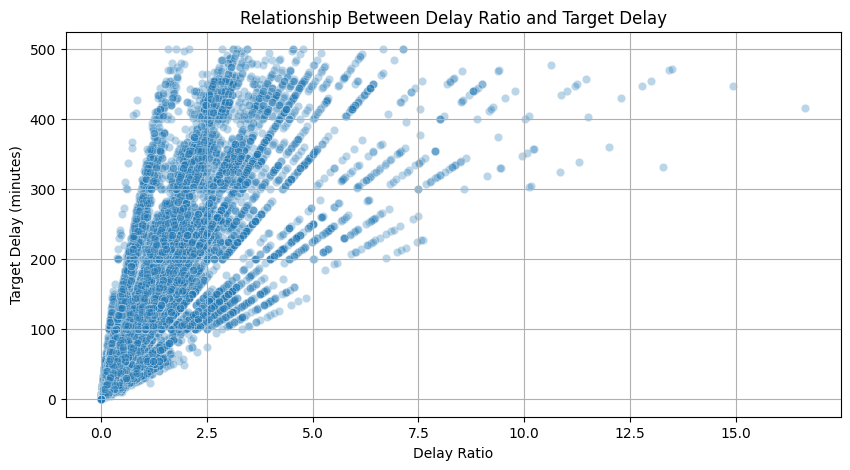

In [ ]:
# Scatter plot to examine relationship between delay_ratio and delay target
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="delay_ratio", y="target", alpha=0.3)
plt.title("Relationship Between Delay Ratio and Target Delay")
plt.xlabel("Delay Ratio")
plt.ylabel("Target Delay (minutes)")
plt.grid(True)
plt.show()

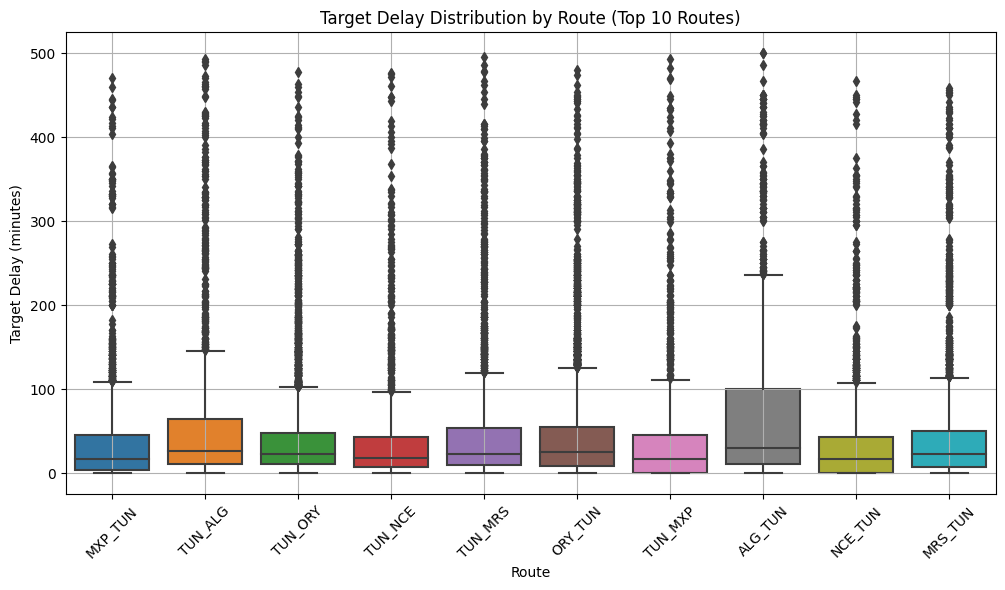

In [ ]:
# Get top 10 most frequent routes
top_routes = df["route"].value_counts().head(10).index

# Boxplot to show target delay distribution across top routes
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df["route"].isin(top_routes)],
            x="route", y="target")
plt.title("Target Delay Distribution by Route (Top 10 Routes)")
plt.xticks(rotation=45)
plt.xlabel("Route")
plt.ylabel("Target Delay (minutes)")
plt.grid(True)
plt.show()

### Observations

- The **scatter plot** shows a clear upward trend: as `delay_ratio` increases, the actual `target` delay also increases. This confirms that `delay_ratio` is a meaningful feature since it reflects relative delay severity across varying flight durations.
- The **box plot** reveals significant variation in delay distributions across different routes. Some routes, such as `ALG_TUN`, show higher median delays and more extreme outliers compared to others like `TUN_NCE`.
- These observations suggest that both `delay_ratio` and `route` add explanatory power to the model by capturing variation in delay patterns related to flight characteristics and geography.